In [3]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

import pandas as pd

In [4]:
holidays = pd.read_csv(r'C:\Users\user\upstage3-python\09.ML_project_team03\holidays_events.csv')
oil = pd.read_csv(r'C:\Users\user\upstage3-python\09.ML_project_team03\oil.csv')
sample_submission = pd.read_csv(r'C:\Users\user\upstage3-python\09.ML_project_team03\sample_submission.csv')
stores = pd.read_csv(r'C:\Users\user\upstage3-python\09.ML_project_team03\stores.csv')
test = pd.read_csv(r'C:\Users\user\upstage3-python\09.ML_project_team03\test.csv')
train = pd.read_csv(r'C:\Users\user\upstage3-python\09.ML_project_team03\train.csv')
#transactions = pd.read_csv(r'C:\Users\user\upstage3-python\09.ML_project_team03\transactions.csv')
transactions = pd.read_csv(r'C:\Users\user\upstage3-python\09.ML_project_team03\transactions2.csv')

## 전처리1: transaction==0 인 경우 행 추가

In [ ]:
# transactions 데이터 가공: 날짜 없는 경우 날짜와 다른 컬럼의 데이터 값 채우기

import pandas as pd

# 데이터 프레임 생성
transactions01 = pd.DataFrame(transactions[(transactions['store_nbr']==1)])

# 날짜를 datetime 형식으로 변환
transactions01['date'] = pd.to_datetime(transactions01['date'])

# 전체 날짜 범위 생성
date_range = pd.date_range(start='2013-01-01', end='2017-08-15')

# 데이터 프레임을 날짜 범위로 리인덱싱
transactions01 = transactions01.set_index('date').reindex(date_range).reset_index()

# 결측치(NaN)를 원하는 값으로 채우기 (예: 0)
transactions01['transactions'] = transactions01['transactions'].fillna(0)
transactions01['store_nbr'] = transactions01['store_nbr'].fillna(1)

# 컬럼 이름 변경
transactions01.columns = ['date', 'store_nbr','transactions']

print(transactions01)

In [347]:
# transactions 데이터 가공: transactions -> transactions2.csv, dict형태의 가공방식도 가능

transactions = pd.read_csv(r'C:\Users\user\upstage3-python\09.ML_project_team03\transactions.csv')


transactions_dict = {}
df_list = []
for i in range(1,55):
    
    # 데이터 프레임 생성
    temp = pd.DataFrame(transactions[(transactions['store_nbr']==i)])

    # 날짜를 datetime 형식으로 변환
    temp['date'] = pd.to_datetime(temp['date'])

    # 전체 날짜 범위 생성
    date_range = pd.date_range(start='2013-01-01', end='2017-08-15')

    # 데이터 프레임을 날짜 범위로 리인덱싱
    temp = temp.set_index('date').reindex(date_range).reset_index()

    # 결측치(NaN)를 원하는 값으로 채우기 (예: 0)
    temp['transactions'] = temp['transactions'].fillna(0)
    temp['store_nbr'] = temp['store_nbr'].fillna(i)

    # 컬럼 이름 변경
    temp.columns = ['date', 'store_nbr','transactions']
    
      
    # 딕셔너리에 저장
    transactions_dict[f'transactions_{i:02d}'] = temp
    #df_list.append(temp)

#transactions2 = pd.concat(df_list)

# 'date' 열을 datetime 형식으로 변환
#transactions2['date'] = pd.to_datetime(transactions2['date'])

# 'day_of_week' 열을 추가하여 요일을 저장
#transactions2['day_of_week'] = transactions2['date'].dt.day_name()

#transactions2.to_csv('transactions2.csv', index=False)


In [349]:
transactions_dict['transactions_01']

,date,store_nbr,transactions
0,2013-01-01,1.0,0.0
1,2013-01-02,1.0,2111.0
2,2013-01-03,1.0,1833.0
3,2013-01-04,1.0,1863.0
4,2013-01-05,1.0,1509.0
...,...,...,...
1683,2017-08-11,1.0,570.0
1684,2017-08-12,1.0,1004.0
1685,2017-08-13,1.0,416.0
1686,2017-08-14,1.0,1733.0


## 전처리2-1: 13일 이상 transactions==0 인 store_nbr 찾기
{10.0} : 2016-01-02 2016-01-04
{12.0} : 2015-04-01	2015-05-28
{14.0} : 2014-08-04	2014-09-10
{17.0} : 2016-01-02 2016-01-04, 2016-03-22 2016-03-23
{18.0} : 2016-08-15	2016-12-02
{20.0} : 2013-01-01	2015-02-12
{21.0} : 2013-01-01	2015-07-23
{22.0} : 2013-01-01	2015-10-08
{24.0} : 2014-04-14 2014-07-23
{25.0} : 2016-08-22	2016-10-26
{29.0} : 2013-01-01 2015-03-19
{30.0} : 2013-07-08	2013-07-30
{36.0} : 2013-01-01 2013-05-08
{42.0} : 2013-01-01	2015-08-20	
{43.0} : 2016-11-14 2016-11-17
{52.0} : 2013-01-01 2017-04-19	
{53.0} : 2013-01-01	2014-05-28

## 전처리2-3: 빈 transaction 값을 전년도, 후년도 같은 날짜의 데이터와 비교하여 넣는다
{10.0} : 2016-01-02 2016-01-04 sales존재 --> transaction처리 필요
{17.0} : 2016-01-02 2016-01-04,sales존재 --> transaction처리 필요

In [402]:
# 결측치 찾기 13일 이상 쉬는 날이 있는 store_nbr 찾기
for i in range(1,55):
    temp = transactions[(transactions['store_nbr'].isin([i])) & (transactions['transactions']==0)]
    if len(temp) >=13:
        print(set(temp['store_nbr']))
# 결과: {7.0}
{10.0} : 2016-01-02 2016-01-04
{12.0} : 2015-04-01	2015-05-28
{14.0} : 2014-08-04	2014-09-10
{17.0} : 2016-01-02 2016-01-04, 2016-03-22 2016-03-23
{18.0} : 2016-08-15	2016-12-02
{20.0} : 2013-01-01	2015-02-12
{21.0} : 2013-01-01	2015-07-23
{22.0} : 2013-01-01	2015-10-08
{24.0} : 2014-04-14 2014-07-23
{25.0} : 2016-08-22	2016-10-26
{29.0} : 2013-01-01 2015-03-19
{30.0} : 2013-07-08	2013-07-30
{36.0} : 2013-01-01 2013-05-08
{42.0} : 2013-01-01	2015-08-20	
{43.0} : 2016-11-14 2016-11-17
{52.0} : 2013-01-01 2017-04-19	
{53.0} : 2013-01-01	2014-05-28

SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (1430553190.py, line 8)

In [420]:
pd.set_option('display.max_rows', None)
temp = transactions[(transactions['store_nbr'].isin([17])) & (transactions['transactions']==0)]
temp

,date,store_nbr,transactions,day_of_week
27008,2013-01-01,17.0,0.0,Tuesday
27366,2013-12-25,17.0,0.0,Wednesday
27373,2014-01-01,17.0,0.0,Wednesday
27731,2014-12-25,17.0,0.0,Thursday
27738,2015-01-01,17.0,0.0,Thursday
28096,2015-12-25,17.0,0.0,Friday
28103,2016-01-01,17.0,0.0,Friday
28104,2016-01-02,17.0,0.0,Saturday
28105,2016-01-03,17.0,0.0,Sunday
28106,2016-01-04,17.0,0.0,Monday


In [415]:
# 'date' 열을 datetime 형식으로 변환
holidays['date'] = pd.to_datetime(holidays['date'])

# 'day_of_week' 열을 추가하여 요일을 저장
holidays['day_of_week'] = holidays['date'].dt.day_name()

In [416]:
holidays[holidays['date'].dt.month==11]

,date,type,locale,locale_name,description,transferred,day_of_week
21,2012-11-02,Holiday,National,Ecuador,Dia de Difuntos,False,Friday
22,2012-11-03,Holiday,National,Ecuador,Independencia de Cuenca,False,Saturday
23,2012-11-06,Holiday,Regional,Santo Domingo de los Tsachilas,Provincializacion de Santo Domingo,False,Tuesday
24,2012-11-07,Holiday,Regional,Santa Elena,Provincializacion Santa Elena,False,Wednesday
25,2012-11-10,Holiday,Local,Guaranda,Independencia de Guaranda,False,Saturday
26,2012-11-11,Holiday,Local,Latacunga,Independencia de Latacunga,False,Sunday
27,2012-11-12,Holiday,Local,Ambato,Independencia de Ambato,False,Monday
74,2013-11-02,Holiday,National,Ecuador,Dia de Difuntos,False,Saturday
75,2013-11-03,Holiday,National,Ecuador,Independencia de Cuenca,False,Sunday
76,2013-11-06,Holiday,Regional,Santo Domingo de los Tsachilas,Provincializacion de Santo Domingo,False,Wednesday


## 각 지점별로 요일마다 다른 매출 형태
요일에 따른 가중치는 월별, 상점별로 따로 준다

 

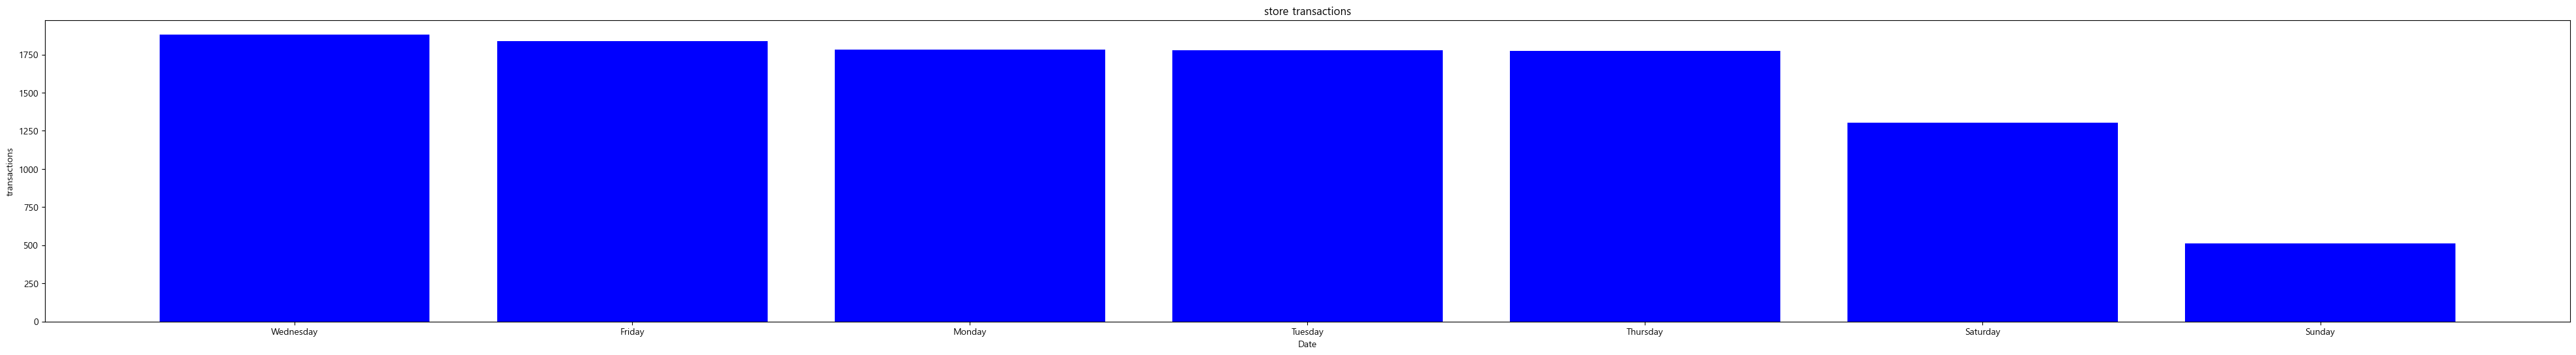

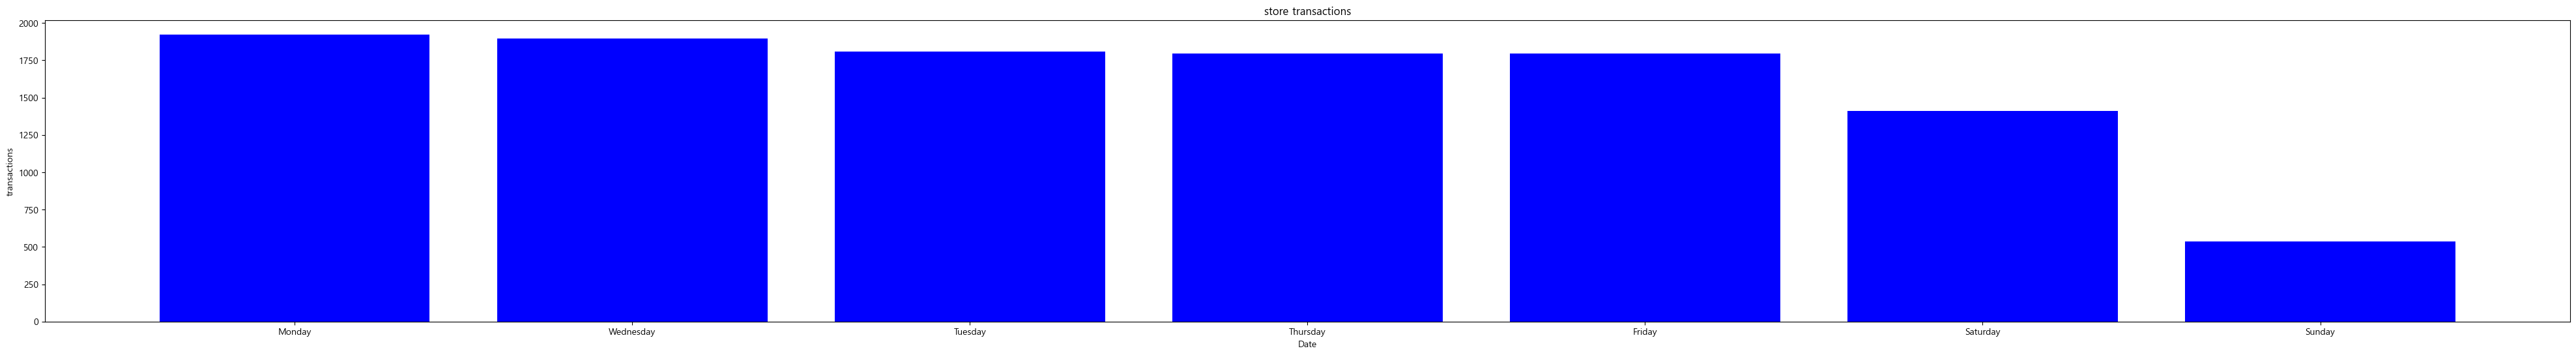

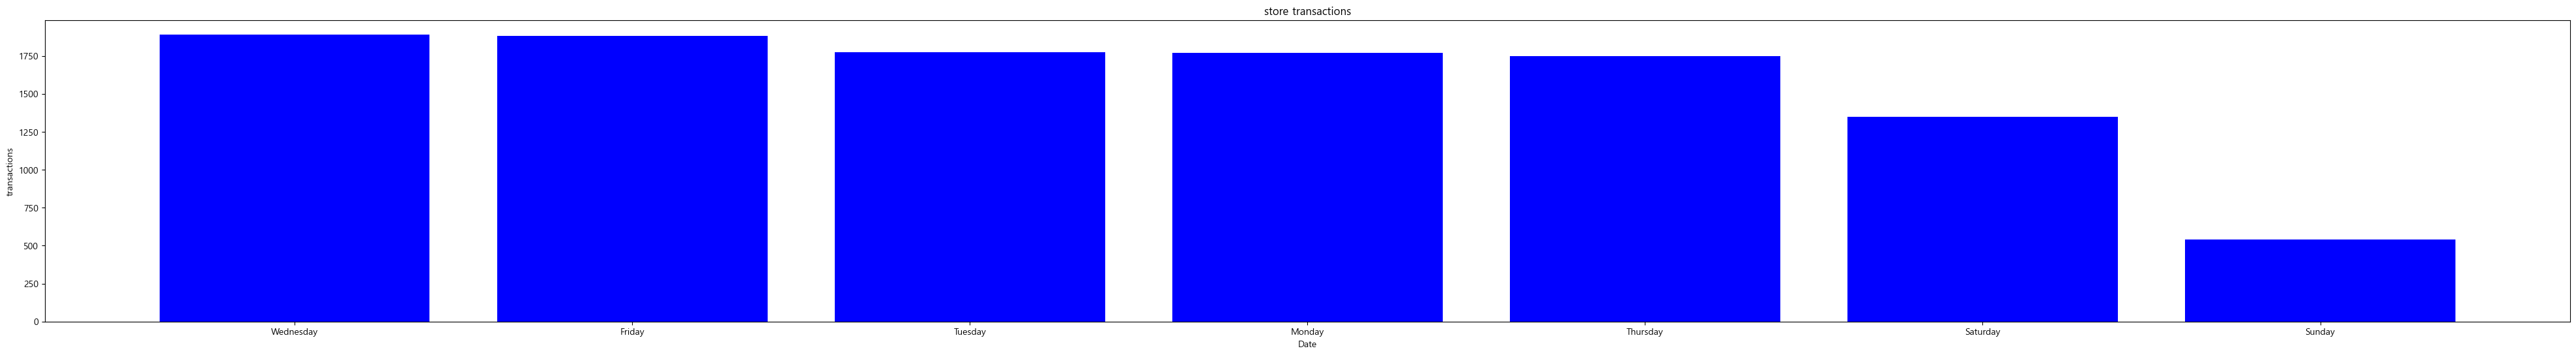

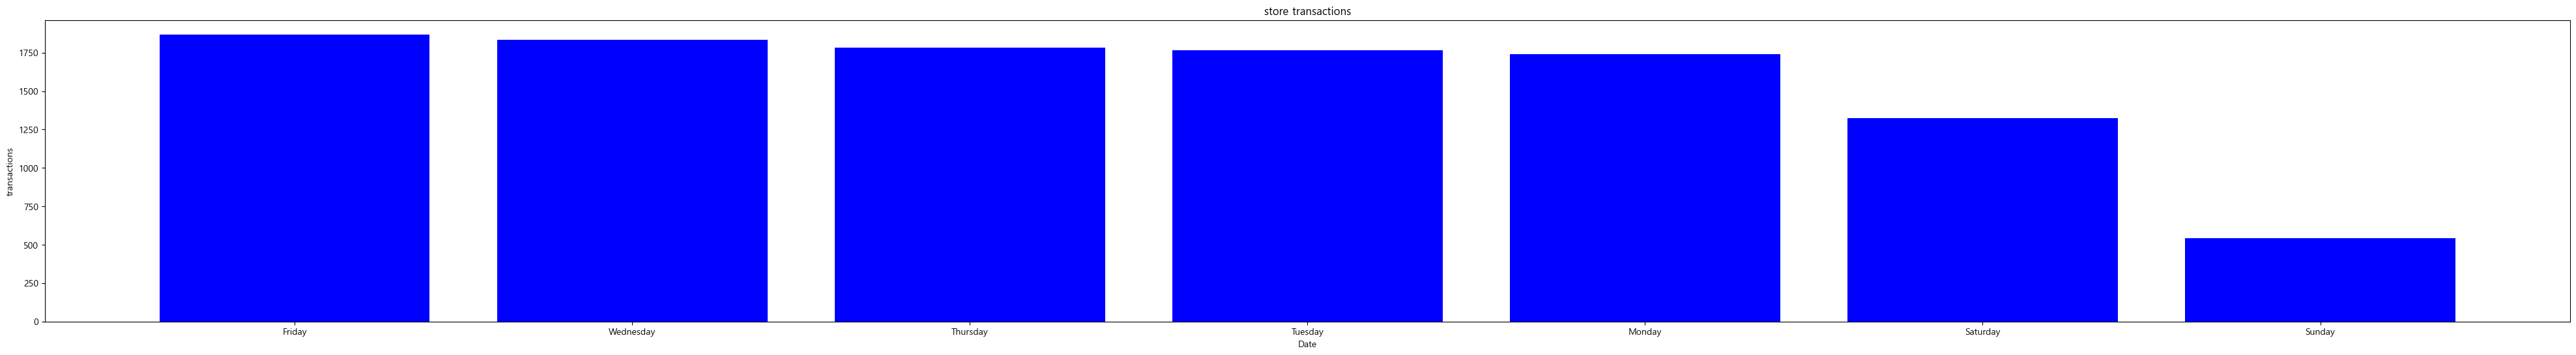

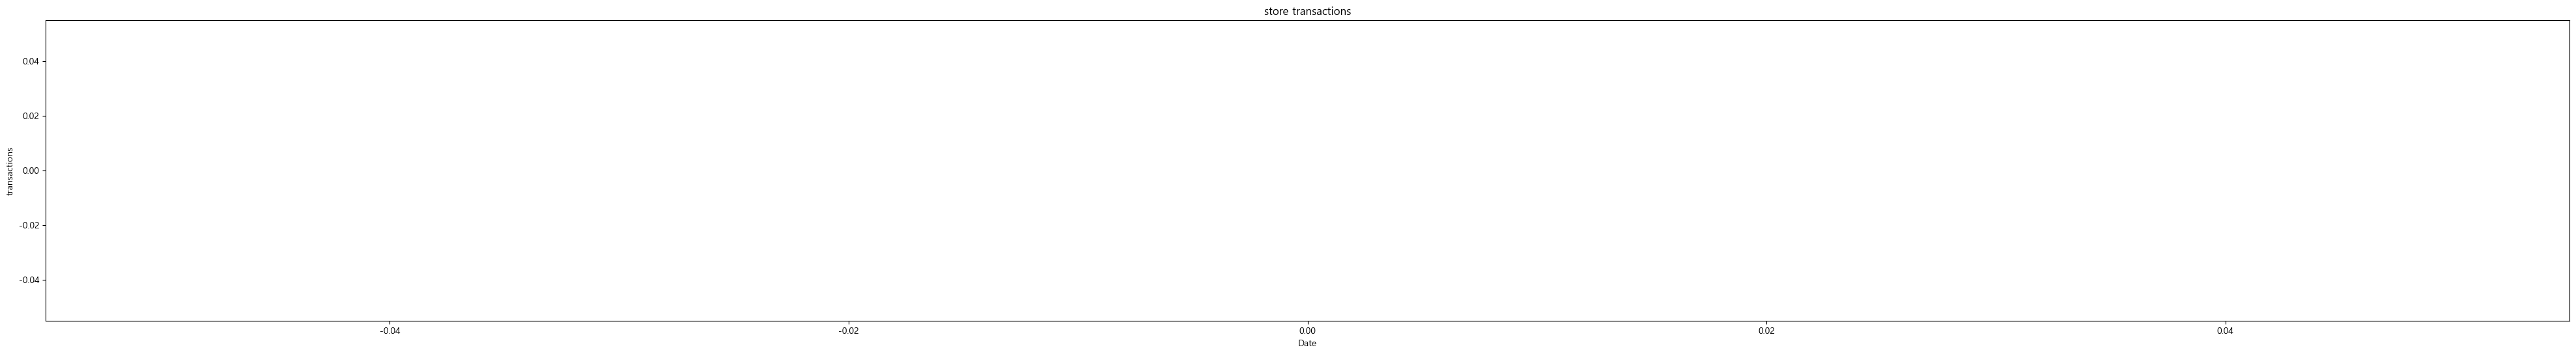

In [46]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

for i in range(2013,2018): #1,2,3,4,5,6,7,8,9,10,11,12
    filtered_data = transactions[(transactions['store_nbr']==1) & (transactions['date'].dt.year==i) & (transactions['date'].dt.month.isin([9]))]
    filtered_data = filtered_data.sort_values(by='transactions', ascending=False)
    # 데이터 시각화
    plt.figure(figsize=(50, 6))
    plt.bar(filtered_data['day_of_week'], filtered_data['transactions'], color='blue')

    plt.xlabel('Date')
    plt.ylabel('transactions')
    plt.title(f'store transactions')

    # 년 단위로 격자 설정
    '''ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

    plt.xticks(rotation=45)  # x축 레이블을 45도 회전시켜 읽기 쉽게 함
    plt.grid(True)  # 격자 추가'''

    plt.show()

## 상점 별 transaction 평균
연도별로 transaction이 상승하거나 하락하는 추세가 없어 보임
null값의 경우 다른 연도 데이터로 넣어도 상관없겠음
null값 처리 후 다시 살펴봐야함



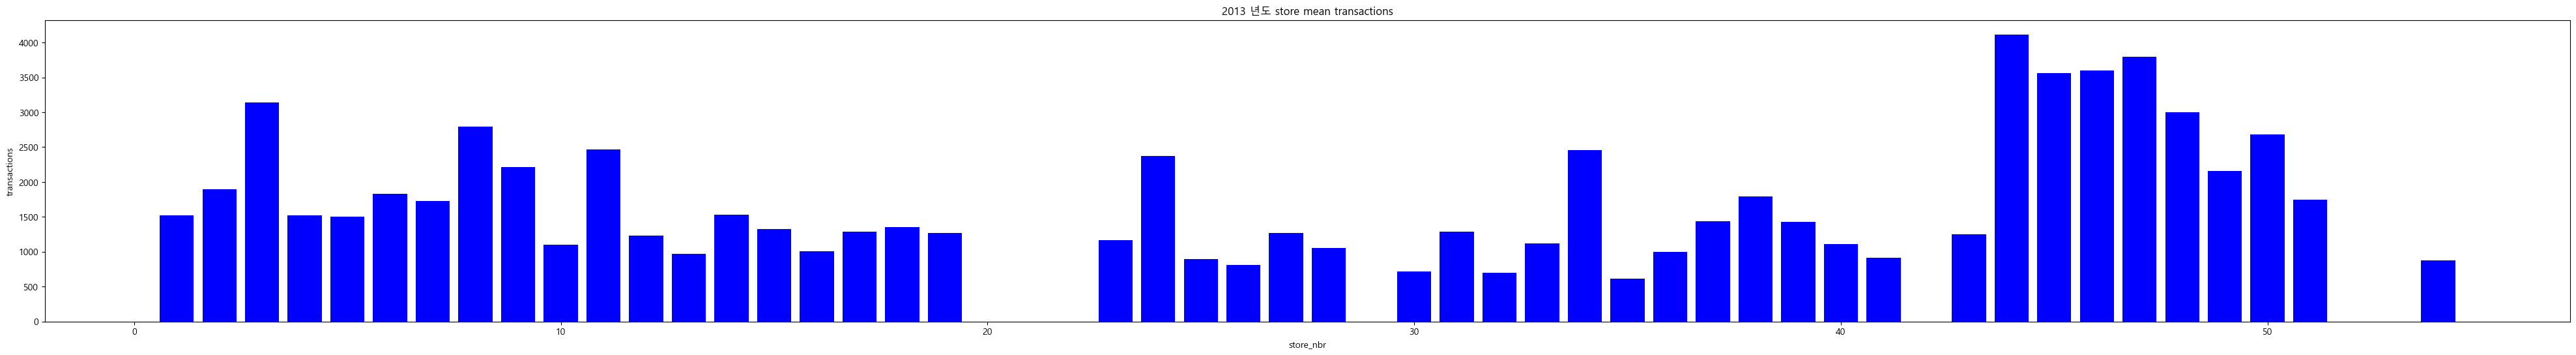

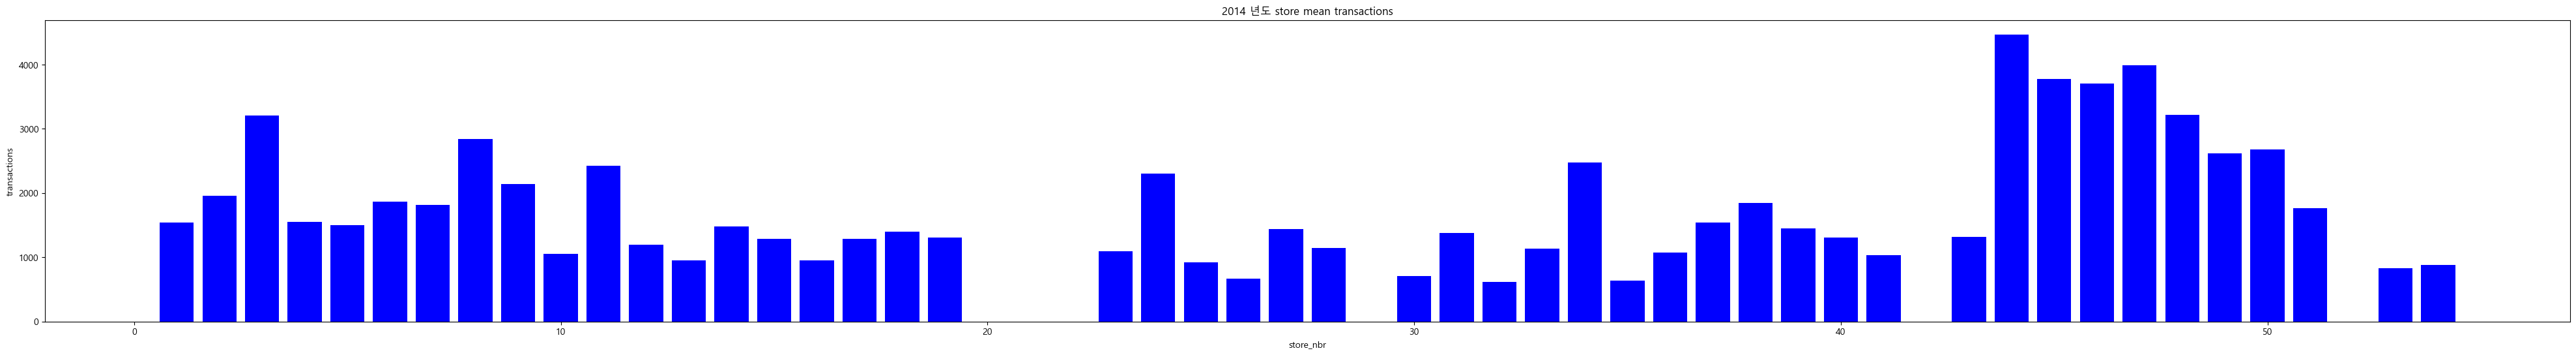

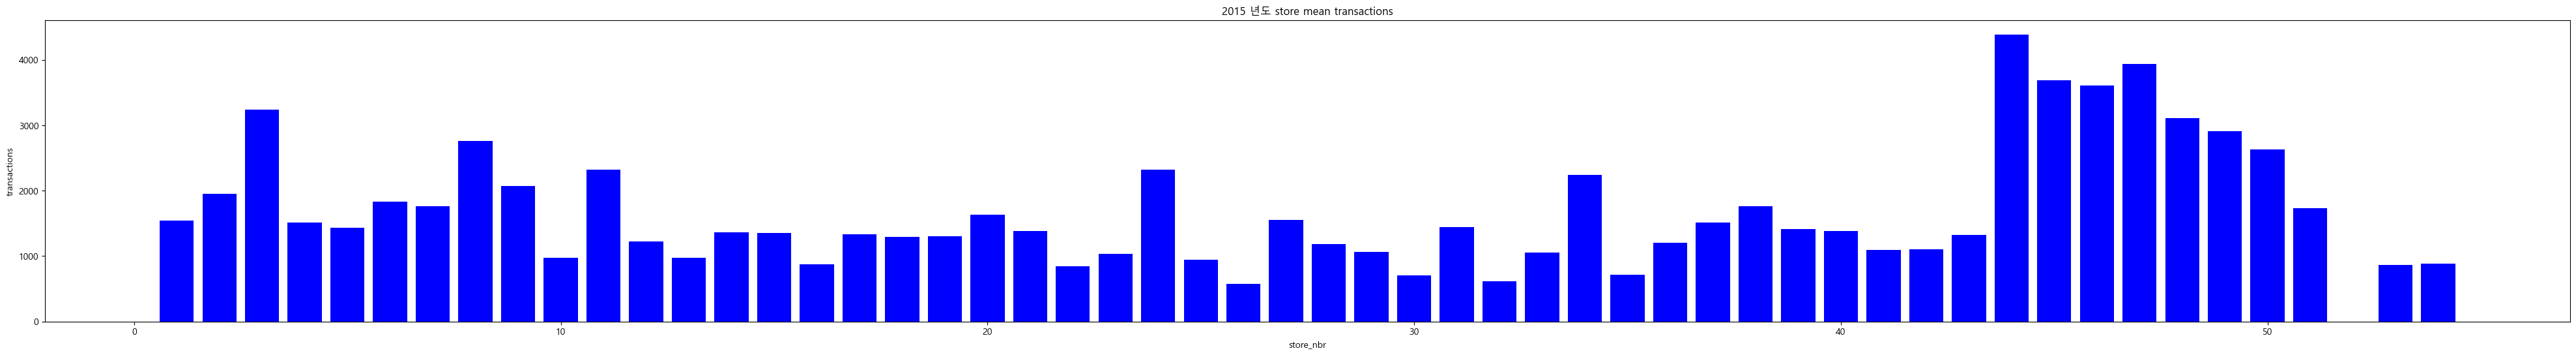

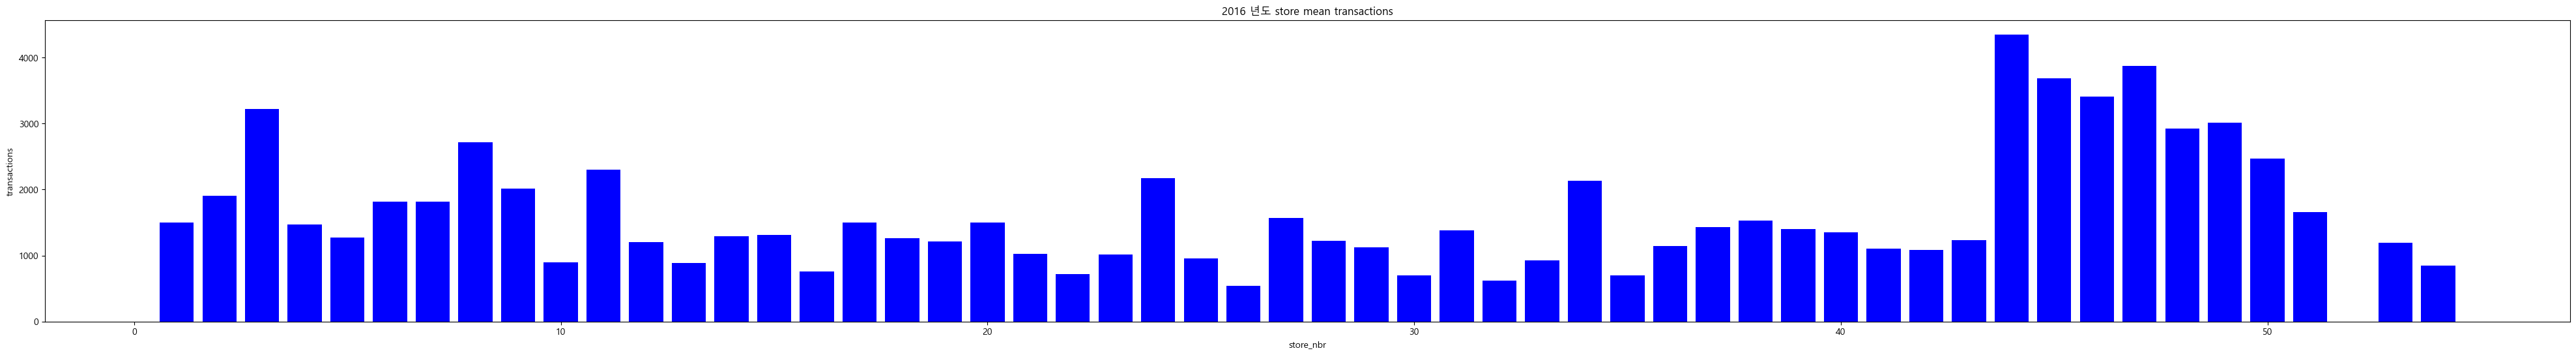

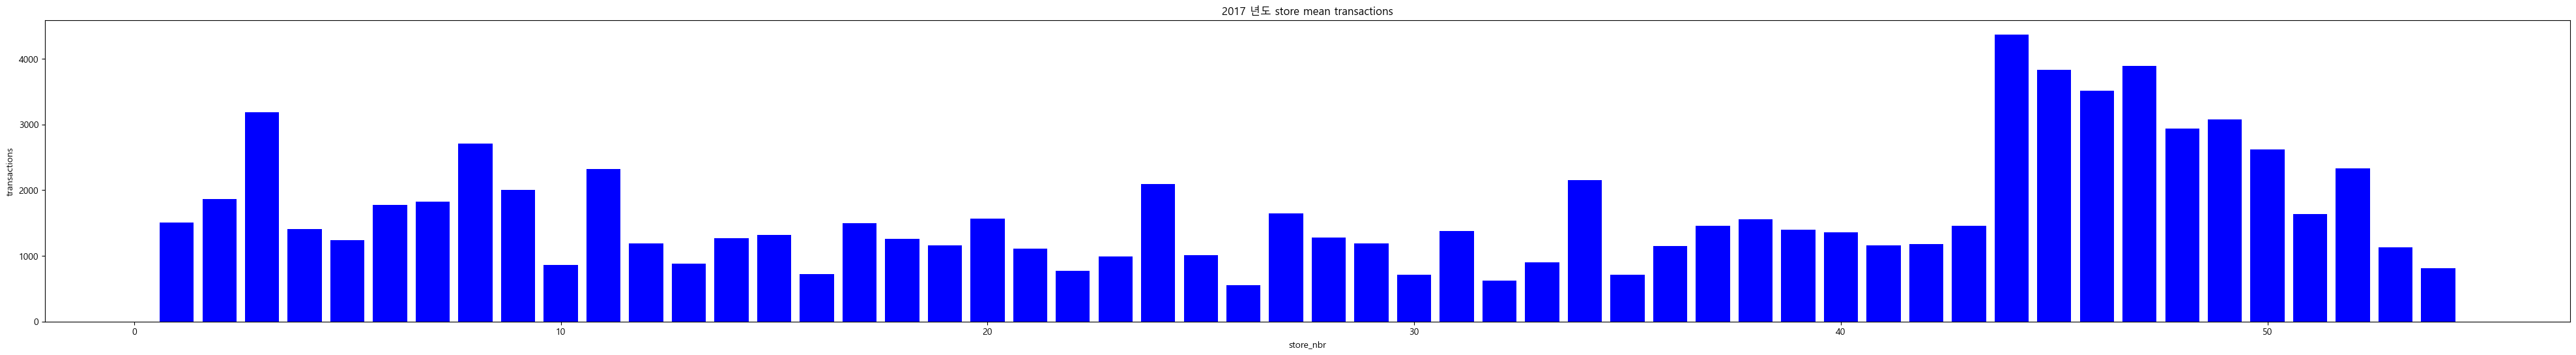

In [79]:
for i in range(2013,2018):
    filtered_data = transactions[(transactions['date'].dt.year==i)]
    result = filtered_data.groupby('store_nbr')['transactions'].mean().reset_index()
    
    plt.figure(figsize=(50, 6))
    plt.bar(result['store_nbr'], result['transactions'], color='blue')

    plt.xlabel('store_nbr')
    plt.ylabel('transactions')
    plt.title(f'{i} 년도 store mean transactions')

## 전처리2-2: transaction 과 sales의 관계

transaction==0 인 날이라고 해서 sales도 0 인 것은 아니다.
sales가 0인 날은 transaction도 0이다.

{10.0} : 2016-01-02 2016-01-04 sales존재 --> transaction처리 필요
{12.0} : 2015-04-01	2015-05-28 sales없음
{14.0} : 2014-08-04	2014-09-10 sales없음
{17.0} : 2016-01-02 2016-01-04,sales존재 --> transaction처리 필요 2016-03-22 2016-03-23 sales없음
{18.0} : 2016-08-15	2016-12-02 sales없음
{20.0} : 2013-01-01	2015-02-12 sales없음
{21.0} : 2013-01-01	2015-07-23 sales없음
{22.0} : 2013-01-01	2015-10-08 sales없음
{24.0} : 2014-04-14 2014-07-23 sales없음
{25.0} : 2016-08-22	2016-10-26 sales없음
{29.0} : 2013-01-01 2015-03-19 sales없음
{30.0} : 2013-07-08	2013-07-30 sales없음
{36.0} : 2013-01-01 2013-05-08 sales없음
{42.0} : 2013-01-01	2015-08-20 sales없음	
{43.0} : 2016-11-14 2016-11-17 sales없음
{52.0} : 2013-01-01 2017-04-19 sales없음	
{53.0} : 2013-01-01	2014-05-28 sales없음

In [5]:
transactions[(transactions['date']=='2016-01-11') & (transactions['store_nbr']==10)]

,date,store_nbr,transactions,day_of_week
16297,2016-01-11,10.0,880.0,Monday


In [15]:
train[(train['date']=='2017-01-02') & (train['store_nbr']==10)]

,id,date,store_nbr,family,sales,onpromotion
2598189,2598189,2017-01-02,10,AUTOMOTIVE,4.000,0
2598190,2598190,2017-01-02,10,BABY CARE,0.000,0
2598191,2598191,2017-01-02,10,BEAUTY,2.000,0
2598192,2598192,2017-01-02,10,BEVERAGES,2025.000,36
2598193,2598193,2017-01-02,10,BOOKS,0.000,0
2598194,2598194,2017-01-02,10,BREAD/BAKERY,174.000,1
2598195,2598195,2017-01-02,10,CELEBRATION,5.000,1
2598196,2598196,2017-01-02,10,CLEANING,1291.000,7
2598197,2598197,2017-01-02,10,DAIRY,616.000,10
2598198,2598198,2017-01-02,10,DELI,512.000,9


In [55]:
train[(train['date'].isin(['2015-01-02','2015-01-03','2015-01-04','2015-01-05','2015-01-06','2016-01-02','2016-01-03','2016-01-04','2016-01-05','2016-01-06','2017-01-02','2017-01-03','2017-01-04','2017-01-05','2017-01-06'])) & (train['store_nbr']==17)][['date','sales']].groupby('date').sum()
#6745.703002

,sales
date,
2015-01-02,10877.90602
2015-01-03,9340.04300
2015-01-04,11434.43200
2015-01-05,9055.29200
2015-01-06,7829.67800
2016-01-02,15516.91701
2016-01-03,20978.23700
2016-01-04,17154.79700
2016-01-05,13896.53200


In [56]:
transactions[(transactions['date'].isin(['2015-01-02','2015-01-03','2015-01-04','2015-01-05','2015-01-06','2015-01-02','2016-01-02','2016-01-03','2016-01-04','2016-01-05','2016-01-06','2017-01-02','2017-01-03','2017-01-04','2017-01-05','2017-01-06'])) & (transactions['store_nbr']==17)]
#1146.0

,date,store_nbr,transactions,day_of_week
27739,2015-01-02,17.0,1491.0,Friday
27740,2015-01-03,17.0,1462.0,Saturday
27741,2015-01-04,17.0,1490.0,Sunday
27742,2015-01-05,17.0,1377.0,Monday
27743,2015-01-06,17.0,1339.0,Tuesday
28104,2016-01-02,17.0,0.0,Saturday
28105,2016-01-03,17.0,0.0,Sunday
28106,2016-01-04,17.0,0.0,Monday
28107,2016-01-05,17.0,1414.0,Tuesday
28108,2016-01-06,17.0,1308.0,Wednesday


In [35]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

# 데이터 로드
data = {
    'date': ['2015-01-02', '2015-01-03', '2015-01-04', '2015-01-05', '2015-01-06',
             '2016-01-02', '2016-01-03', '2016-01-04', '2016-01-05', '2016-01-06',
             '2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06'],
    'sales': [6745.7030020, 6884.8970000, 7206.7259970, 6094.0330000, 5999.3550000, 
              9838.1719800, 10686.0650000, 7530.9840000, 6977.4140100, 6303.4819900, 
              10540.6720000, 9617.9720000, 6367.8750100, 6192.6470000, 5703.6180000],
    'transactions': [1146, 1254, 1114, 1123, 1168, 0, 0, 0, 977, 889, 1039, 1106, 834, 842, 780]
}
df = pd.DataFrame(data)

# 학습 데이터와 예측할 데이터를 분리
train_df = df[df['transactions'] != 0]
predict_df = df[df['transactions'] == 0]

# 선형 회귀 모델 훈련
X_train = train_df[['sales']]
y_train = train_df['transactions']
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
X_predict = predict_df[['sales']]
predicted_transactions = model.predict(X_predict)

# 0값 대체
df.loc[df['transactions'] == 0, 'transactions'] = predicted_transactions

# 결과 출력
print(df)


          date         sales  transactions
0   2015-01-02   6745.703002   1146.000000
1   2015-01-03   6884.897000   1254.000000
2   2015-01-04   7206.725997   1114.000000
3   2015-01-05   6094.033000   1123.000000
4   2015-01-06   5999.355000   1168.000000
5   2016-01-02   9838.171980   1099.283871
6   2016-01-03  10686.065000   1122.607412
7   2016-01-04   7530.984000   1035.818562
8   2016-01-05   6977.414010    977.000000
9   2016-01-06   6303.481990    889.000000
10  2017-01-02  10540.672000   1039.000000
11  2017-01-03   9617.972000   1106.000000
12  2017-01-04   6367.875010    834.000000
13  2017-01-05   6192.647000    842.000000
14  2017-01-06   5703.618000    780.000000


In [8]:
transactions.loc[(transactions['date']=='2016-01-02') & (transactions['store_nbr']==10),'transactions'] = 1099

In [16]:
transactions.loc[(transactions['date']=='2016-01-03') & (transactions['store_nbr']==10),'transactions'] = 1122

In [17]:
transactions.loc[(transactions['date']=='2016-01-04') & (transactions['store_nbr']==10),'transactions'] = 1035

In [18]:
transactions[(transactions['date']=='2016-01-04') & (transactions['store_nbr']==10)]

,date,store_nbr,transactions,day_of_week
16290,2016-01-04,10.0,1035.0,Monday


In [57]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# 데이터 로드
data = {
    'date': ['2015-01-02', '2015-01-03', '2015-01-04', '2015-01-05', '2015-01-06',
             '2016-01-02', '2016-01-03', '2016-01-04', '2016-01-05', '2016-01-06',
             '2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06'],
    'sales': [10877.90602, 9340.043, 11434.432, 9055.292, 7829.678, 
              15516.91701, 20978.237, 17154.797, 13896.532, 12225.78, 
              28026.04302, 26587.82399, 14444.261, 16044.039, 11460.925],
    'transactions': [1491, 1462, 1490, 1377, 1339, 0, 0, 0, 1414, 1308, 2170, 1760, 1381, 1539, 1363]
}
df = pd.DataFrame(data)

# 학습 데이터와 예측할 데이터를 분리
train_df = df[df['transactions'] != 0]
predict_df = df[df['transactions'] == 0]

# 선형 회귀 모델 훈련
X_train = train_df[['sales']]
y_train = train_df['transactions']
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
X_predict = predict_df[['sales']]
predicted_transactions = model.predict(X_predict)

# 0값 대체
df.loc[df['transactions'] == 0, 'transactions'] = predicted_transactions

# 결과 출력
print(df)


          date        sales  transactions
0   2015-01-02  10877.90602   1491.000000
1   2015-01-03   9340.04300   1462.000000
2   2015-01-04  11434.43200   1490.000000
3   2015-01-05   9055.29200   1377.000000
4   2015-01-06   7829.67800   1339.000000
5   2016-01-02  15516.91701   1548.307887
6   2016-01-03  20978.23700   1725.376630
7   2016-01-04  17154.79700   1601.411780
8   2016-01-05  13896.53200   1414.000000
9   2016-01-06  12225.78000   1308.000000
10  2017-01-02  28026.04302   2170.000000
11  2017-01-03  26587.82399   1760.000000
12  2017-01-04  14444.26100   1381.000000
13  2017-01-05  16044.03900   1539.000000
14  2017-01-06  11460.92500   1363.000000


In [12]:
transactions.loc[(transactions['date']=='2016-01-02') & (transactions['store_nbr']==17),'transactions'] = 1548

In [13]:
transactions.loc[(transactions['date']=='2016-01-03') & (transactions['store_nbr']==17),'transactions'] = 1725

In [14]:
transactions.loc[(transactions['date']=='2016-01-04') & (transactions['store_nbr']==17),'transactions'] = 1601

In [19]:
transactions[(transactions['date']=='2016-01-04') & (transactions['store_nbr']==17)]

,date,store_nbr,transactions,day_of_week
28106,2016-01-04,17.0,1601.0,Monday


In [21]:
transactions.to_csv('transactions3.csv', index=False)

## cluster끼리 transaction 평균 비교
null값 처리 후 비교 해야함

In [81]:
stores_transactions = pd.merge(transactions, stores, how='inner', on='store_nbr')

In [84]:
temp = stores_transactions.groupby('cluster')['transactions'].mean().reset_index()

In [94]:
temp.rename(columns = {'transactions' : 'cluster_mean_transactions'}, inplace = True)

In [102]:
stores_transactions[stores_transactions['cluster']==1].groupby('store_nbr')['transactions'].mean()

store_nbr
24    2262.654407
25     941.400619
27    1482.222421
Name: transactions, dtype: float64

In [97]:
stores_transactions = pd.merge(stores_transactions, temp, how='inner', on='cluster')

In [115]:
stores_transactions[stores_transactions['type']=='A'].groupby('store_nbr')['transactions'].mean()

store_nbr
44    4336.966607
45    3697.742993
46    3571.921884
47    3897.322600
48    3045.787120
49    2727.550984
50    2614.456768
51    1713.544425
52    2333.838983
Name: transactions, dtype: float64

In [151]:
temp = pd.DataFrame(stores.groupby('state')['city'].value_counts(ascending=True))
temp

city
state                          city               
Azuay                          Cuenca            3
Bolivar                        Guaranda          1
Chimborazo                     Riobamba          1
Cotopaxi                       Latacunga         2
El Oro                         Machala           2
Esmeraldas                     Esmeraldas        1
Guayas                         Daule             1
                               Libertad          1
                               Playas            1
                               Guayaquil         8
Imbabura                       Ibarra            1
Loja                           Loja              1
Los Rios                       Babahoyo          1
                               Quevedo           1
Manabi                         El Carmen         1
                               Manta             2
Pastaza                        Puyo              1
Pichincha                      Cayambe           1
                               Quito            18
Santa Elena                    Salinas           1
Santo Domingo de los Tsachilas Santo Domingo     3
Tungurahua                     Ambato            2

In [157]:
temp = pd.DataFrame(stores[stores['city']=='Cuenca'])
temp

,store_nbr,city,state,type,cluster
36,37,Cuenca,Azuay,D,2
38,39,Cuenca,Azuay,B,6
41,42,Cuenca,Azuay,D,2


## 비슷한 상점 상품 매출을 비교하여 onpromotion이 영향을 끼쳤는지 비교해 볼 수 있다
1.먼저 매출 null값인 경우 처리한다 -> 어떻게?
2.코사인 유사도 또는 다른 유사도 측정 방법을 활용하여 유사한 매출을 보이는 상점을 선정한다
3.선택한 store_nbr의 데이터를 onpromotion이 있는 날과 없는 날로 분리합니다.
4.onpromotion이 있는 날의 매출과 없는 날의 매출을 비교합니다.

In [176]:
train['date'] = pd.to_datetime(train['date'])
temp2016 = train[(train['date'].dt.year==2016) & (train['store_nbr']==1) & (train['family']=='PRODUCE')]
temp2015 = train[(train['date'].dt.year==2015) & (train['store_nbr']==1) & (train['family']=='PRODUCE')]

In [177]:
temp2016

,id,date,store_nbr,family,sales,onpromotion
1945974,1945974,2016-01-01,1,PRODUCE,0.000,0
1947756,1947756,2016-01-02,1,PRODUCE,2199.262,0
1949538,1949538,2016-01-03,1,PRODUCE,1479.032,1
1951320,1951320,2016-01-04,1,PRODUCE,3771.711,0
1953102,1953102,2016-01-05,1,PRODUCE,2794.882,0
...,...,...,...,...,...,...
2587494,2587494,2016-12-27,1,PRODUCE,2577.530,7
2589276,2589276,2016-12-28,1,PRODUCE,3263.385,215
2591058,2591058,2016-12-29,1,PRODUCE,2186.298,8
2592840,2592840,2016-12-30,1,PRODUCE,2568.254,8


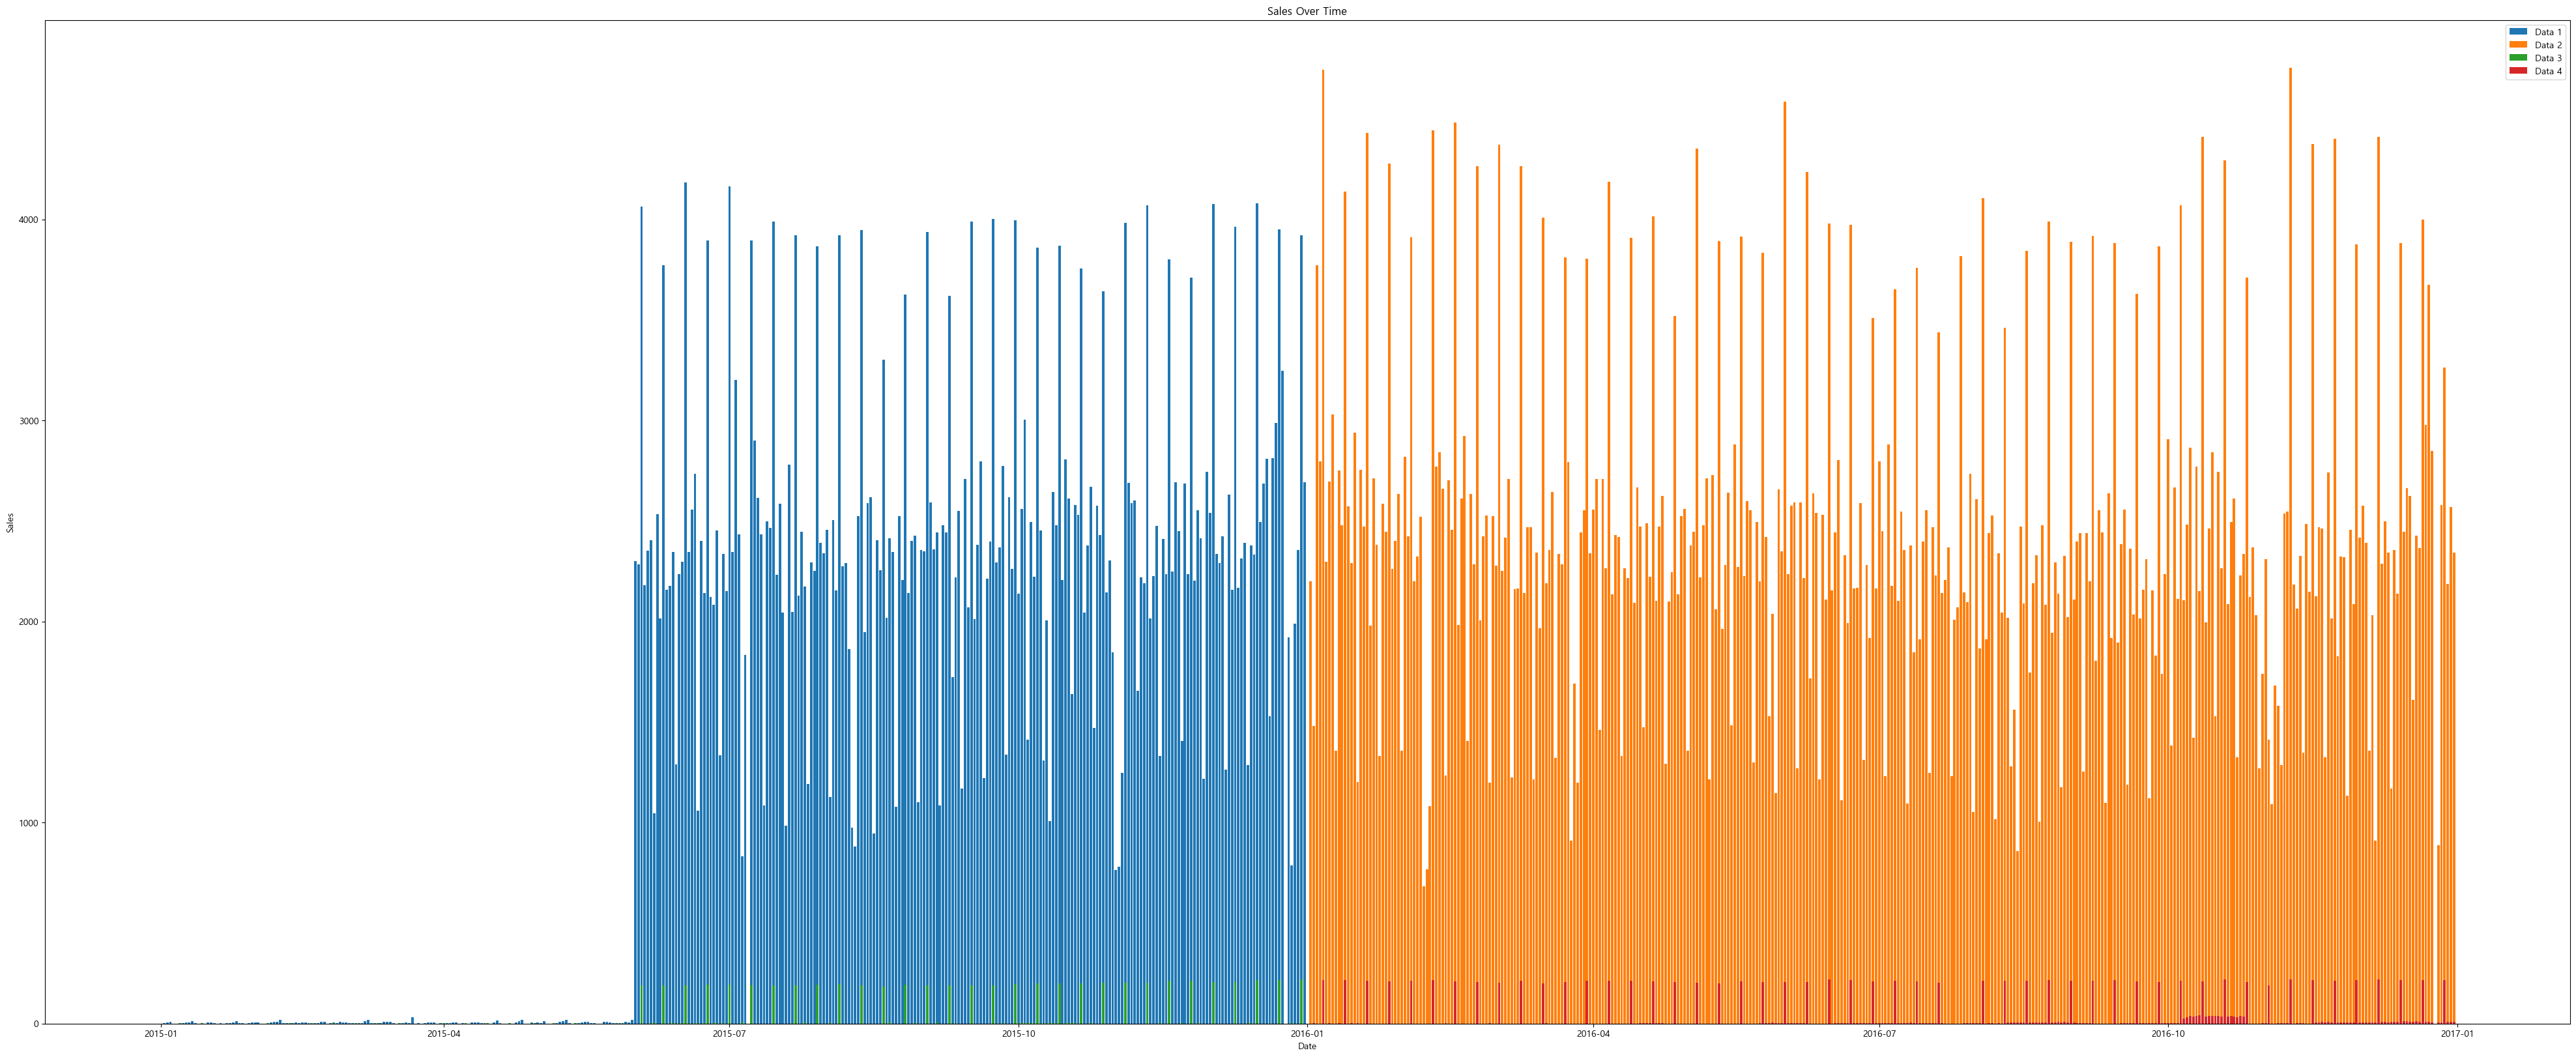

In [186]:
import matplotlib.pyplot as plt
import numpy as np
        
# 꺾은선 그래프 그리기
plt.figure(figsize=(50, 20))
plt.bar(temp2015['date'], temp2015['sales'], label='Data 1')
plt.bar(temp2016['date'], temp2016['sales'], label='Data 2')
plt.bar(temp2015['date'], temp2015['onpromotion'], label='Data 3')
plt.bar(temp2016['date'], temp2016['onpromotion'], label='Data 4')

# 레이블 및 제목 설정
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Over Time')
plt.legend()

# 그래프 보여주기
plt.show()


## 25일 쉬고, 23일 24일 매출 큰 폭(정확한수치?)으로 상승 -> 모든 경우가 그러한가? 사실 우리는 8월이 중요함 따라서 안함


In [207]:
temp2015 = train[(train['date'].dt.month.isin([7,8])) & (train['date'].dt.year==2015) & (train['store_nbr']==4) & (train['family']=='PRODUCE')]
temp2015

,id,date,store_nbr,family,sales,onpromotion
1620957,1620957,2015-07-01,4,PRODUCE,3866.179,165
1622739,1622739,2015-07-02,4,PRODUCE,2141.373,0
1624521,1624521,2015-07-03,4,PRODUCE,2620.668,0
1626303,1626303,2015-07-04,4,PRODUCE,3365.820,0
1628085,1628085,2015-07-05,4,PRODUCE,3639.376,0
...,...,...,...,...,...,...
1722531,1722531,2015-08-27,4,PRODUCE,1365.363,0
1724313,1724313,2015-08-28,4,PRODUCE,2019.562,0
1726095,1726095,2015-08-29,4,PRODUCE,2425.067,0
1727877,1727877,2015-08-30,4,PRODUCE,3435.858,0


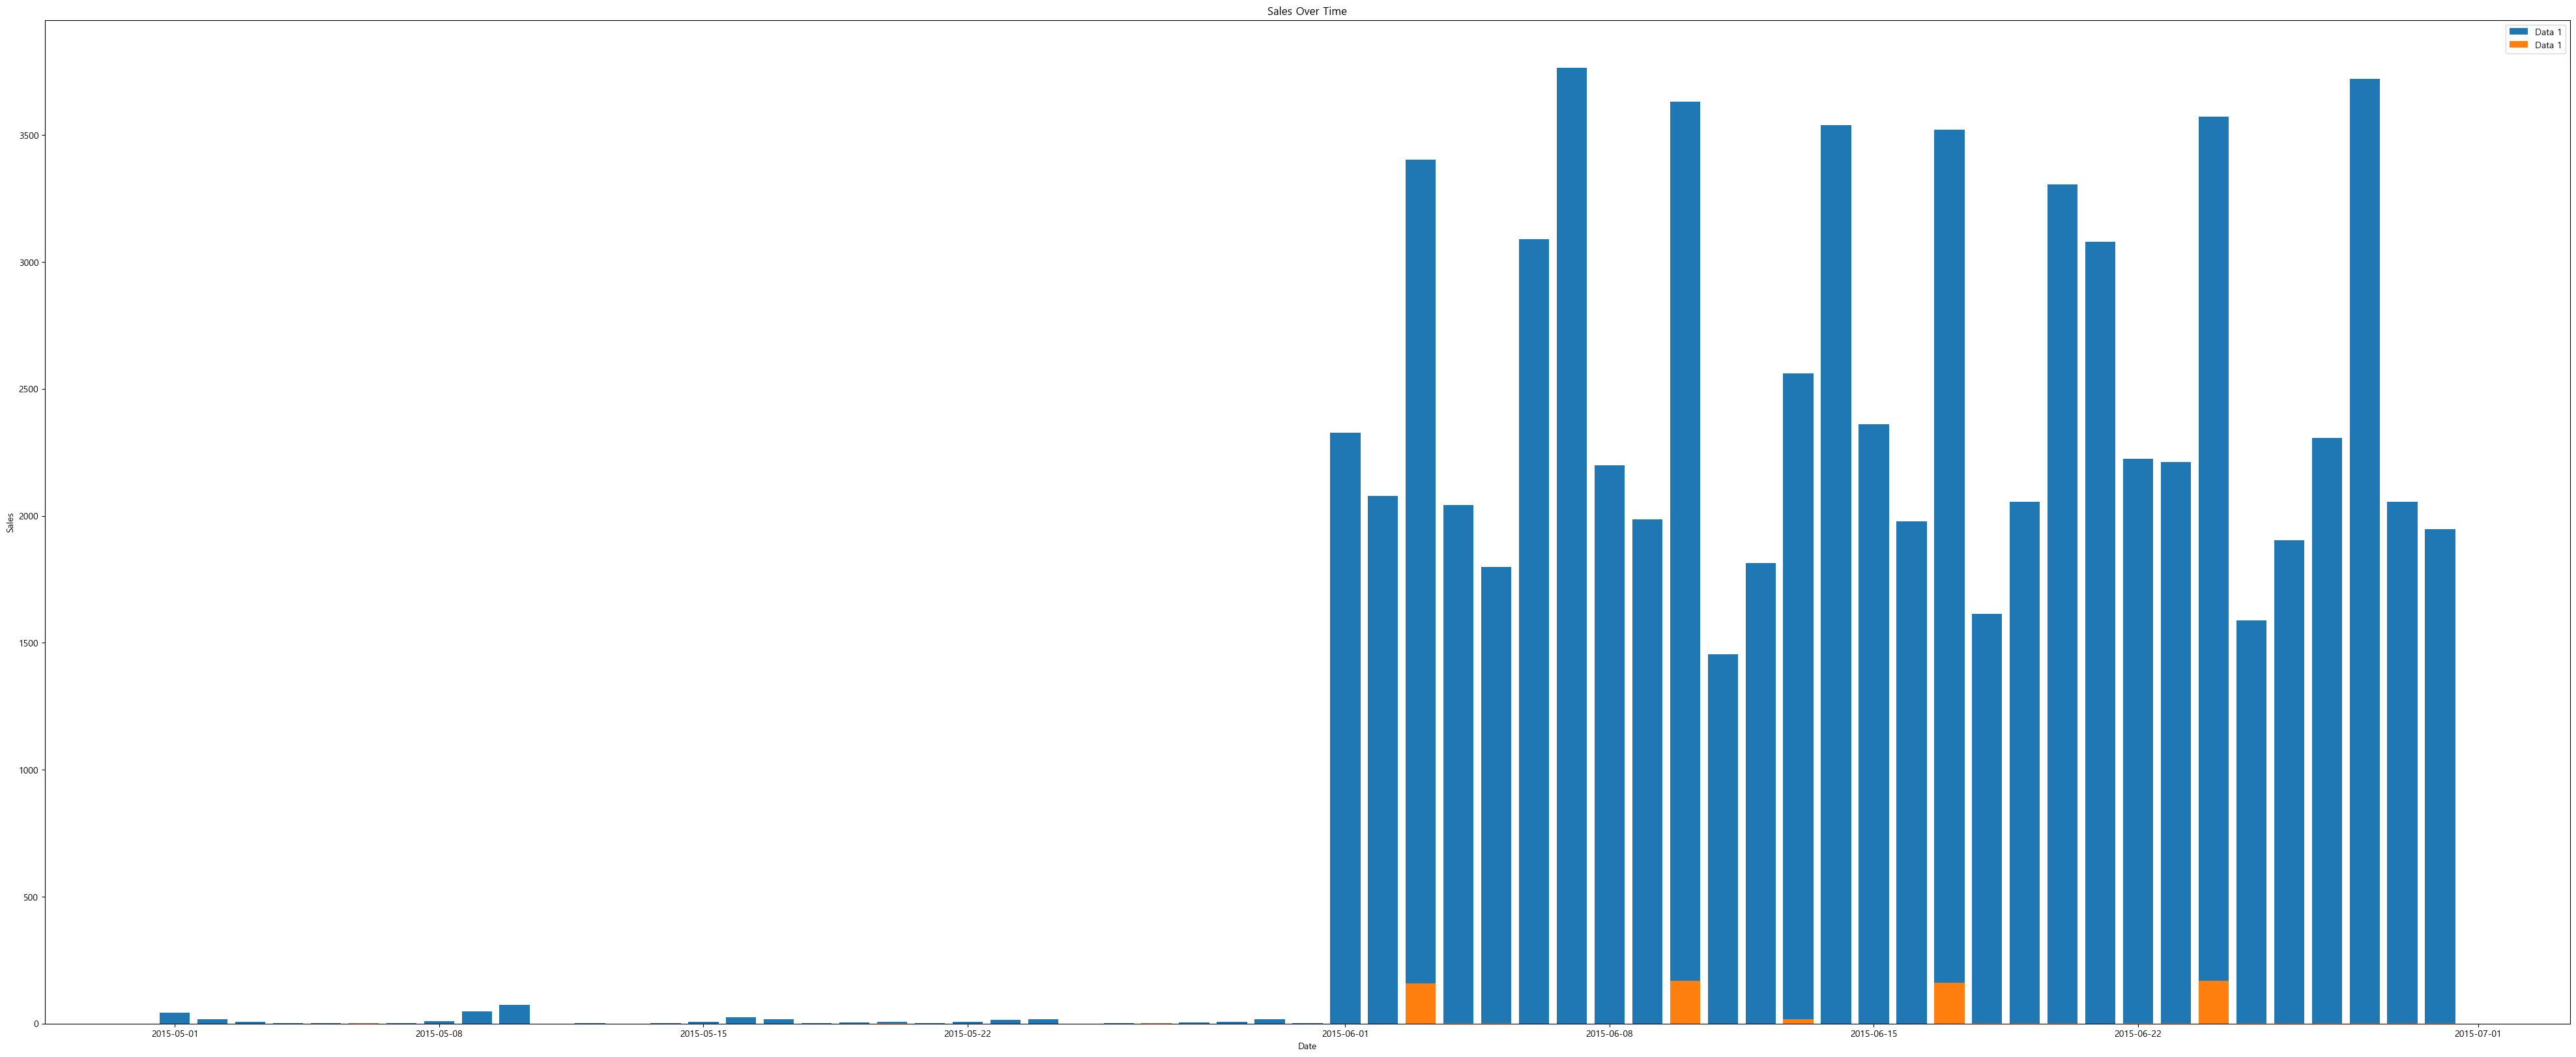

In [204]:
import matplotlib.pyplot as plt
import numpy as np
        
# 꺾은선 그래프 그리기
plt.figure(figsize=(50, 20))
plt.bar(temp2015['date'], temp2015['sales'], label='Data 1')
plt.bar(temp2015['date'], temp2015['onpromotion'], label='Data 1')
# 레이블 및 제목 설정
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Over Time')
plt.legend()

# 그래프 보여주기
plt.show()

In [167]:
import pandas as pd
import statsmodels.api as sm

temp = train[(train['date'].dt.year==2016) & (train['family']=='PRODUCE')]

# onpromotion 변수를 포함한 회귀 분석 모델 생성
temp['onpromotion'] = temp['onpromotion'].astype(int)
X = temp[['store_nbr', 'family', 'onpromotion']]
X = pd.get_dummies(X, columns=['store_nbr', 'family'], drop_first=True)
y = temp['sales']

# 상수항 추가
X = sm.add_constant(X)

# 회귀 분석 모델 피팅
model = sm.OLS(y, X).fit()

# 결과 요약
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     205.0
Date:                Tue, 04 Jun 2024   Prob (F-statistic):               0.00
Time:                        16:21:09   Log-Likelihood:                -59451.
No. Observations:               19710   AIC:                         1.190e+05
Df Residuals:                   19655   BIC:                         1.194e+05
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.3420      0.259     16.768   

C:\Users\user\AppData\Local\Temp\ipykernel_25152\3810699711.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['onpromotion'] = temp['onpromotion'].astype(int)


In [160]:
train[train['store_nbr']==1]

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000000,0
1,1,2013-01-01,1,BABY CARE,0.000000,0
2,2,2013-01-01,1,BEAUTY,0.000000,0
3,3,2013-01-01,1,BEVERAGES,0.000000,0
4,4,2013-01-01,1,BOOKS,0.000000,0
...,...,...,...,...,...,...
2999134,2999134,2017-08-15,1,POULTRY,234.892000,0
2999135,2999135,2017-08-15,1,PREPARED FOODS,42.822998,0
2999136,2999136,2017-08-15,1,PRODUCE,2240.230000,7
2999137,2999137,2017-08-15,1,SCHOOL AND OFFICE SUPPLIES,0.000000,0


## type별 store_nbr 
A: 44, 45, 49, 52, 46, 47, 48, 50, 51
B: 9, 11, 34, 39, 20, 21, 18, 31
C: 10, 12, 13, 15, 19, 14, 22, 16, 30, 32, 33, 35, 40, 54, 17
D: 25, 24, 27,  1,  2,  6, 53,  3,  7,  8,  4, 23,  5, 38, 41, 26, 37, 42
E: 28, 43, 36, 29

store_nbr A
44    4336.966607
45    3697.742993
46    3571.921884
47    3897.322600
48    3045.787120
49    2727.550984
50    2614.456768
51    1713.544425
52    2333.838983

stores_transactions[stores_transactions['type']=='A'][['city','state']].drop_duplicates()
	city	state
69954	Quito	Pichincha
74985	Manta	Manabi
80134	Ambato	Tungurahua
81811	Guayaquil	Guayas
store_nbr B
9     2097.948687
11    2370.219570
18    1322.655172
20    1564.949395
21    1126.859626
31    1374.281287
34    2302.752086
39    1424.005959

store_nbr C
10     986.562985
12    1212.160891
13     938.248210
14    1396.733822
15    1318.554893
16     873.284436
17    1371.257467
19    1257.451671
22     751.350224
30     707.631420
32     635.197376
33    1038.738379
35     670.578162
40    1300.652952
54     865.924821

store_nbr D
1     1523.844272
2     1920.036374
3     3201.879475
4     1502.987470
5     1400.045915
6     1829.293556
7     1788.652537
8     2767.285800
23    1066.291592
24    2262.654407
25     941.400619
26     634.719309
27    1482.222421
37    1478.974374
38    1708.612634
41    1051.965414
42    1114.786111
53    1011.209940

store_nbr E
28    1167.319022
29    1122.938215
36    1120.650548
43    1305.236842



In [ ]:
for i in range(2013,2018):
    filtered_data = transactions[(transactions['date'].dt.year==i)]
    result = filtered_data.groupby('store_nbr')['transactions'].mean().reset_index()
    
    plt.figure(figsize=(50, 6))
    plt.bar(result['store_nbr'], result['transactions'], color='blue')

    plt.xlabel('store_nbr')
    plt.ylabel('transactions')
    plt.title(f'{i} 년도 store mean transactions')